In [102]:
# Definición de variables 
import pandapower.networks as pp_net
import pandapower as pp
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
# cargamos el modelo eléctrico 
net = pp_net.case9()
net.line.iloc[:, list(net.line.columns).index('max_i_ka')] = net.line.iloc[:, list(net.line.columns).index('max_i_ka')]
net.bus.iloc[:, list(net.bus.columns).index('max_vm_pu')] = 1.1
net.bus.iloc[:, list(net.bus.columns).index('min_vm_pu')] = 0.9
net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

In [81]:
scaling = {1:.63, 2:.62, 3:.6, 4:.58, 5:.59, 6:.65, 7:.72, 8:.85, 
            9:.95, 10:.99, 11:1, 12:.99, 13:.93, 14:.92, 15:.9,16:.88, 
            17:.9, 18:.9, 19:.96, 20:.98, 21:.96, 22:.9, 23:.8, 24:.7 }
multiplier = 1.2

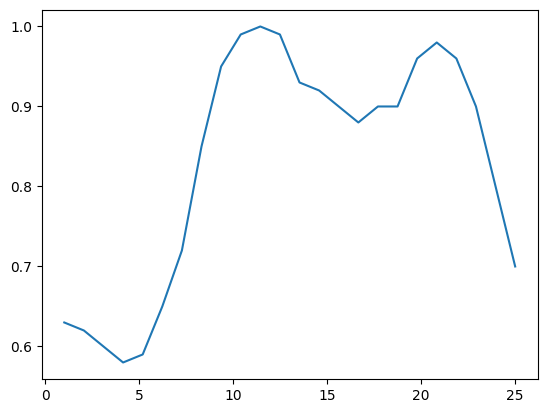

In [116]:
T = np.linspace(1,25,24)
l = [scaling.get(e) for e in scaling]
plt.plot(T, l)

In [84]:
gen1q_base = []
gen2q_base = []
demanda_q = []
for t in range(1,25):
    net.load.iloc[:,list(net.load.columns).index('p_mw')] = net.load.iloc[:,list(net.load.columns).index('p_mw')]*scaling.get(t)*multiplier
    net.load.iloc[:,list(net.load.columns).index('q_mvar')] = net.load.iloc[:,list(net.load.columns).index('q_mvar')]*scaling.get(t)*multiplier
    pp.runpp(net)
    gen1q_base.append(net.res_gen['q_mvar'][0])
    gen2q_base.append(net.res_gen['q_mvar'][1])
    demanda_q.append(net.res_load['q_mvar'])


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

In [98]:
df = read_csv('../Var_V_Qgen.csv')
gen1q_res = []
gen2q_res = []
for i in range(df.shape[0]):
    row = df.iloc[i]
    key = int(row[0].split(',')[0].replace('(',''))
    if key:
        gen2q_res.append(float(row[1].replace(' ','')))
    else:
        gen1q_res.append(float(row[1].replace(' ','')))

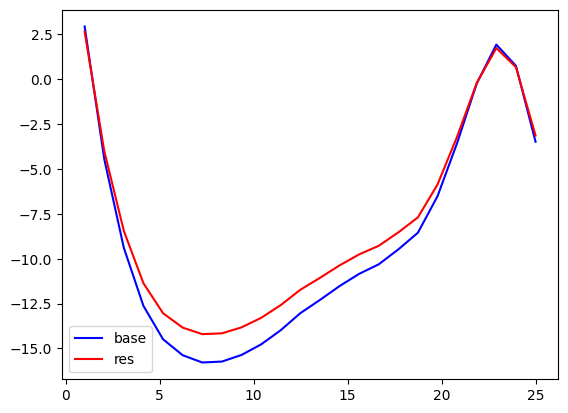

In [111]:
T = np.linspace(1,25,24)
plt.plot(T, gen1q_base, 'b', label='base')
plt.plot(T, gen1q_res, 'r', label='res')
plt.legend()

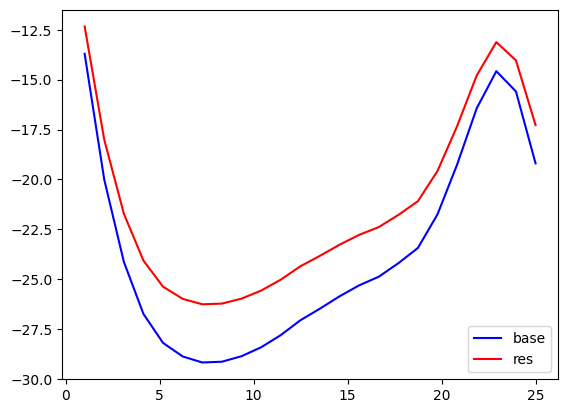

In [112]:
T = np.linspace(1,25,24)
plt.plot(T, gen2q_base, 'b', label='base')
plt.plot(T, gen2q_res, 'r', label='res')
plt.legend()